## Optimizing Model Parameters

To optimize the model parameters gradient descent is done on the function whose lose function is convex and differentiable.

Lets combine all the codes that we did till now and train a simple Fashion Mnist classification model

#### Importing necessary libraries

In [180]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor


#### Loading the data

In [181]:

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

#### Defining Neural Network class

In [182]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork()

In [183]:
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


### Hyperparameters 

They inturn control the parameters of the model. They are adjustable unlike the model parameters and we perform hyperparameter tuning for the best results.

Some of the hyper parameters are :

* epochs : times to iterate over the dataset
* batch size : number of dataset to be included in a training at a time
* learning rate : contribution of gradients in updating model parameters

## Loss function

It measures the degree of dissimilarity of obtained result to the target value, and it is the loss function that we want to minimize during training. By differentiating the loss function with the variables that we want to update we can calculate their gradient.

some of the loss function are :

| Loss Function                 | Description                                                                                      | Mathematical Formula                                                                                             |
|-------------------------------|--------------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------------------------|
| `nn.CrossEntropyLoss`         | Combines `nn.LogSoftmax` and `nn.NLLLoss` in one single class. It is useful for classification tasks. | \(\text{CrossEntropy}(x, y) = - \sum_{i} y_i \log \left(\frac{\exp(x_i)}{\sum_j \exp(x_j)}\right)\)              |
| `nn.MSELoss`                  | Mean Squared Error Loss. Measures the average of the squares of the errors or deviations.         | \(\text{MSE}(x, y) = \frac{1}{n} \sum_{i=1}^n (x_i - y_i)^2\)                                                    |
| `nn.L1Loss`                   | Mean Absolute Error Loss. Measures the mean absolute error between each element in the input and target. | \(\text{L1}(x, y) = \frac{1}{n} \sum_{i=1}^n |x_i - y_i|\)                                                        |
| `nn.BCELoss`                  | Binary Cross Entropy Loss. It is used for binary classification tasks.                           | \(\text{BCE}(x, y) = -\frac{1}{n} \sum_{i=1}^n [y_i \log(x_i) + (1 - y_i) \log(1 - x_i)]\)                       |
| `nn.BCEWithLogitsLoss`        | Combines a `Sigmoid` layer and the `BCELoss` in one single class.                                | \(\text{BCEWithLogits}(x, y) = \text{BCE}(\sigma(x), y)\) where \(\sigma(x) = \frac{1}{1 + \exp(-x)}\)           |
| `nn.SmoothL1Loss`             | Combines advantages of L1Loss and MSELoss, less sensitive to outliers than MSELoss.              | \(\text{SmoothL1}(x, y) = \frac{1}{n} \sum_{i=1}^n z_i\) where \(z_i = \begin{cases} \frac{1}{2}(x_i - y_i)^2 & \text{if } |x_i - y_i| < 1 \\ |x_i - y_i| - \frac{1}{2} & \text{otherwise} \end{cases}\) |
 

## Optimizer

Gradient descent is one of the optimizer that we use in adjusting the model parameters to reduce the model error in each training step.

Once we find the gradient of parameters with respect to the loss function. We pass the gradients to the optimizers and it updates the parameters of the model.

Some of the optimizers are :

* Gradient Descent
* Stochastic Gradient Descent
* ADAM
* RMSProp


#### Gradient Descent Optimizer
 
Gradient descent is an iterative optimization algorithm widely employed in machine learning to minimize a cost or loss function. The objective is to find the values of model parameters that result in the lowest possible cost. The algorithm begins with an initial guess for the parameters and iteratively updates them by moving in the direction opposite to the steepest ascent of the cost function, as indicated by the gradient. The update is proportional to the negative gradient and is controlled by a learning rate, determining the step size at each iteration. This process continues until convergence, where the change in parameters becomes negligible, signifying a minimum or plateau. The learning rate is a critical factor, influencing the algorithm's convergence speed and stability.



![gradient_descent](./images/gradient_descent.png)

**Types of Gradient Descent:**

    * Batch Gradient Descent: Updates are made using the entire dataset.

    * Stochastic Gradient Descent (SGD): Updates are made using only one randomly chosen data point at a time.
    
    * Mini-batch Gradient Descent: Updates are made using a small random subset of the dataset.


![gradient_types](./images/gradient_descent_types.png)

Lets call the `Stochastic Gradient Descent` optimizer

```python
optimizer = torch.optim.SGD(model.parameters(), lr= learning_rate)
```

If we want to reset the gradient of model parameters to zero, then we do

```python
optimizer.zero_grad()
```

## Complete Neural Network in Pytorch

In [184]:
import torch
from torch import nn
import matplotlib.pyplot as plt

### Loading the datasets

In [185]:
from torchvision import datasets
from torchvision.transforms import ToTensor

# Download training data from open datasets.
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(), # Read file and convert image to Tensor
)

# Download test data from open datasets.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

### Seeing Datasize 

In [186]:
print(training_data.data.shape)
print(test_data.data.shape)

torch.Size([60000, 28, 28])
torch.Size([10000, 28, 28])


In [187]:
training_data.__dict__ 

{'root': 'data',
 'transform': ToTensor(),
 'target_transform': None,
 'transforms': StandardTransform
 Transform: ToTensor(),
 'train': True,
 'data': tensor([[[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]],
 
         [[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]],
 
         [[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]],
 
         ...,
 
         [[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
        

In [188]:
training_data.targets.shape

torch.Size([60000])

### Finding total class in the datasets

In [189]:
n_classes = len(torch.unique(training_data.targets))
print("The total classes in the dataset is : {} ".format(len(torch.unique(training_data.targets))))

The total classes in the dataset is : 10 


### Histogram Plot for each class data

We can see from the histogram plot below all the classes are equally distributed

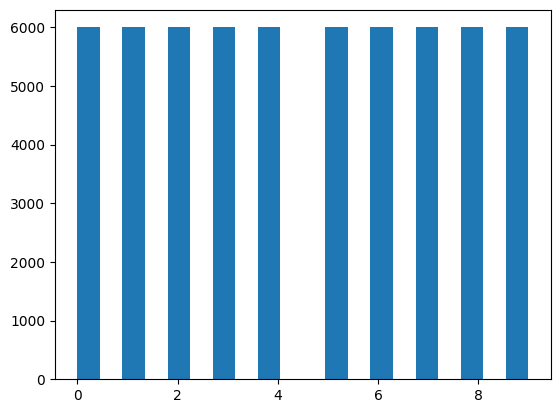

In [190]:
plt.hist(training_data.targets, bins= 20)
plt.show()

### Splitting Data into training and validation

In [191]:
training_data, val_data = torch.utils.data.random_split(training_data, [50000, 10000])
print(len(training_data.indices))
print(len(val_data.indices))

50000
10000


In [192]:
training_data

### Visualizing dataset

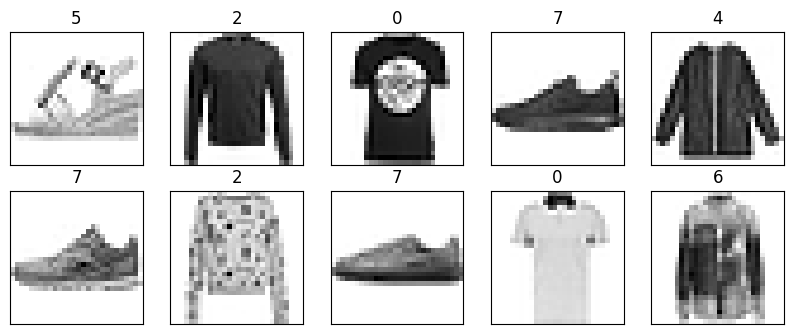

In [193]:
# plot first few images
plt.figure(figsize=(10,10))
for i in range(10):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(training_data[i][0][0], cmap=plt.cm.binary) 
  plt.title(training_data[i][1]) 
plt.show() 

### Creating Data loader

In [194]:
batch_size = 128

from torch.utils.data import DataLoader

# we shuffle during training only
train_dataloader = DataLoader(training_data, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

### Defining training and evaluating functions

In [195]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)

    model.train()
    
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward() # Perform backward propagation
        optimizer.step()  # Perform gradient update
        optimizer.zero_grad() # Remove any previous gradient calculation done by optimizer
         

        if batch % 100 == 0:
            loss, current = loss.item(), batch * batch_size + len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def val_loop(dataloader, model, loss_fn):

    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    # Evaluating the model with torch.no_grad() ensures that no gradients are computed during test mode
    # also serves to reduce unnecessary gradient computations and memory usage for tensors with requires_grad=True
    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

### Defining hyperparameters

In [196]:
import numpy as np

# the model here will be made of 1 input layer, 3 hidden layers and 1 ouput layer.
input_size= 28 * 28
output_size = n_classes
hidden_1_shape=128
hidden_2_shape=64
hidden_3_shape=32

In [197]:
# building model by stacking layers
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.stacked_layers = nn.Sequential(
            nn.Linear(input_size, hidden_1_shape),
            nn.ReLU(),
            nn.Linear(hidden_1_shape, hidden_2_shape),
            nn.ReLU(),
            nn.Linear(hidden_2_shape, hidden_3_shape),
            nn.ReLU(),
            nn.Linear(hidden_3_shape, output_size),
        )
    
    def forward(self, inputs):
        return self.stacked_layers(self.flatten(inputs))

model= NeuralNetwork()
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (stacked_layers): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=32, bias=True)
    (5): ReLU()
    (6): Linear(in_features=32, out_features=10, bias=True)
  )
)


### Selecting Loss Function and optimizer

In [198]:
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters())

### Model Training

In [199]:
epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_func, optimizer)
    val_loop(val_dataloader, model, loss_func)
print("Done!")

Epoch 1
-------------------------------
loss: 2.305952  [  128/50000]
loss: 2.302813  [12928/50000]
loss: 2.301071  [25728/50000]
loss: 2.315879  [38528/50000]
Test Error: 
 Accuracy: 9.6%, Avg loss: 2.299687 

Epoch 2
-------------------------------
loss: 2.300497  [  128/50000]
loss: 2.293708  [12928/50000]
loss: 2.293266  [25728/50000]
loss: 2.290909  [38528/50000]
Test Error: 
 Accuracy: 12.3%, Avg loss: 2.291650 

Epoch 3
-------------------------------
loss: 2.297634  [  128/50000]
loss: 2.285992  [12928/50000]
loss: 2.288657  [25728/50000]
loss: 2.281723  [38528/50000]
Test Error: 
 Accuracy: 14.6%, Avg loss: 2.282843 

Epoch 4
-------------------------------
loss: 2.276761  [  128/50000]
loss: 2.279216  [12928/50000]
loss: 2.268854  [25728/50000]
loss: 2.277230  [38528/50000]
Test Error: 
 Accuracy: 15.9%, Avg loss: 2.272517 

Epoch 5
-------------------------------
loss: 2.273249  [  128/50000]
loss: 2.272851  [12928/50000]
loss: 2.246687  [25728/50000]
loss: 2.252822  [38528/

## Saving and Loading model

In [200]:
import torchvision.models as models

PyTorch models store the learned parameters in an internal state dictionary, called state_dict.

In [201]:
torch.save(model.state_dict(), 'model/path/weight.pth')

#### Loading the model

In [ ]:
model.load_state_dict(torch.load('model/path/weight.pth'))